# RNA Sequencing HW 3
Binary classification using linear models (whether the tumor is <2 or >3

Import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler


In [ ]:
x_train_data = pd.read_csv('train_X.csv')
y_train_data = pd.read_csv('train_y.csv')
x_test_data = pd.read_csv('test_X.csv')

x_train_data.head()
y_train_data.head()

,Unnamed: 0,xml_neoplasm_histologic_grade
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,0
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,1
2,EACD1021-7B52-4531-8806-B7555B73AC84,0
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,0
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,1


Now that we know how our data looks like, let's split them into data frames so that we can use them without labels.

In [ ]:
x = x_train_data[x_train_data.columns[1:]]
y = y_train_data[y_train_data.columns[1:]]
y = y.values.ravel()
x_test = x_test_data[x_test_data.columns[1:]]

I tested with many different test sizes and random_state, you can see them in the code here. I thought there is just not enough hyperparameters to play around with, so I decided to play around with test size too. Sometimes they gave same performance as 70-30 split or 80-20 split, but so far I got the best score on Kaggle using test size of 0.55.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.55, random_state=14)
# for just logistic regression with max iteration 3000
#0.45, 0.895, but kaggle 0.9166
#0.4, 0.89325, but kaggle 0.9166
#0.35, 0.8846, but kaggle 0.9166
#0.3, 0.86567
#0.25,
#0.2,
#0.15
#0.1

# for logistic regression with more penalty L2 and C=0.005

#0.55, 0.8408
#0.5, 0.8648, kaggle 0.9315
#0.47, 0.8851
#0.46, 0.887
#0.45, 0.895  (1.0), 0.795 (random seed 42), 0.895 (0.005) kaggle 0.9315 (0.004)
#0.44, 0.8877
#0.4, 0.89325 (1.0),
#0.35, 0.8846 (1.0),
#0.3, 0.858   (1.0),


Let's try all of the models and see which one is the best to use!


In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=10.0)),  # adjust the alpha parameter
    ('LASSO', Lasso(alpha=10.0))  # adjust the alpha parameter
]


In [ ]:
# Train and compare the models
best_model = None
best_f1_score = 0.0
best_accuracy = 0.0

for name, model in models:
    if name != 'Logistic Regression':
        # Normalize the features for linear regression models
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_val_scaled = scaler.transform(x_val)
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_val_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)

    # Round the predicted values to 0 or 1
    y_pred = np.round(y_pred)

    # Calculate F1 Score
    f1 = f1_score(y_val, y_pred)

    # Calculate Accuracy
    accuracy = accuracy_score(y_val, y_pred)

    # Print results
    print(f"Model: {name}")
    print(f"F1 Score: {f1}")
    print(f"Accuracy: {accuracy}")
    print()

    # Update best model based on F1 Score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model
        best_accuracy = accuracy

print(f"Best Model (based on F1 Score): {best_model}")
print(f"Best F1 Score: {best_f1_score}")
print(f"Best Accuracy: {best_accuracy}")


Model: Logistic Regression
F1 Score: 0.8592057761732851
Accuracy: 0.8408163265306122

Model: Linear Regression
F1 Score: 0.8633093525179857
Accuracy: 0.8448979591836735

Model: Ridge Regression
F1 Score: 0.8633093525179857
Accuracy: 0.8448979591836735

Model: LASSO
F1 Score: 0.7139107611548556
Accuracy: 0.5551020408163265

Best Model (based on F1 Score): LinearRegression()
Best F1 Score: 0.8633093525179857
Best Accuracy: 0.8448979591836735


For me, I played around with Alpha levels for Ridge and LASSO, but it could not beat the logistic regression on this binary classification case for our tumor. So I decided to go with Logistic regression.

For linear regression here, I rounded the y up so I can use them for linear regression.

It also seemed like no matter how much hyperparameter tuning I do, this model really depended on which random seed I used to pull out the validation set. Below was my attempt to find the best random seed, but for some reason it would be working well and it would crash at some point, so I could never find a better random seed to use.

In [ ]:
# models = [
#       ('Logistic Regression', LogisticRegression(C=0.005, penalty='l2', solver='liblinear', max_iter=3000)),
#       ('Linear Regression', LinearRegression()),
#       ('Ridge Regression', Ridge(alpha=10.0)),  # adjust the alpha parameter
#       ('LASSO', Lasso(alpha=10.0))  # adjust the alpha parameter
#   ]

# # Train and compare the models
# best_model = None
# best_f1_score = 0.0
# best_accuracy = 0.0

# for i in range(500):
#   x = x_train_data[x_train_data.columns[1:]]
#   y = y_train_data[y_train_data.columns[1:]]
#   y = y.values.ravel()

#   x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.45, random_state=i)

#   for name, model in models:
#       if name != 'Logistic Regression':
#           # Normalize the features for linear regression models
#           scaler = StandardScaler()
#           x_train_scaled = scaler.fit_transform(x_train)
#           x_val_scaled = scaler.transform(x_val)
#           model.fit(x_train_scaled, y_train)
#           y_pred = model.predict(x_val_scaled)
#       else:
#           model.fit(x_train, y_train)
#           y_pred = model.predict(x_val)

#       # Round the predicted values to 0 or 1
#       y_pred = np.round(y_pred)

#       # Calculate F1 Score
#       f1 = f1_score(y_val, y_pred)

#       # Calculate Accuracy
#       accuracy = accuracy_score(y_val, y_pred)

#       # # Print results
#       # print(f"Model: {name}")
#       # print(f"F1 Score: {f1}")
#       # print(f"Accuracy: {accuracy}")
#       # print()

#       # Update best model based on F1 Score
#       if f1 > best_f1_score:
#           best_f1_score = f1
#           best_model = model
#           best_accuracy = accuracy
#           seed = i
#       print(i) #iteration check

# print(f"Best Model (based on F1 Score): {best_model}")
# print(f"Best F1 Score: {best_f1_score}")
# print(f"Best Accuracy: {best_accuracy}")
# print(f"Best Seed: {seed}")

Now that we know that we are going to use logistic regression, let's explore more and see if we can make our prediction any better.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
# Step 3: Address class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=14)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Step 4: Hyperparameter tuning
# Experiment with different values of 'C' and regularization penalties
logistic_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=1000)
logistic_model.fit(x_train_resampled, y_train_resampled)

# Step 5: Feature selection
# Select the top 'k' features based on ANOVA F-statistic
k = 10
feature_selector = SelectKBest(f_classif, k=k)
x_train_selected = feature_selector.fit_transform(x_train_resampled, y_train_resampled)
x_val_selected = feature_selector.transform(x_val_scaled)

# Re-train the logistic regression model with the selected features
logistic_model.fit(x_train_selected, y_train_resampled)

# Step 6: Make predictions and evaluate
y_val_pred = logistic_model.predict(x_val_selected)

# Calculate F1 Score and Accuracy
f1 = f1_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)

# Print performance metrics
print(f"F1 Score on Validation Data: {f1}")
print(f"Accuracy on Validation Data: {accuracy}")

F1 Score on Validation Data: 0.7910447761194029
Accuracy on Validation Data: 0.7714285714285715


It actually seems like using SMOTE to address class imbalance made our model perform worse, by using cross validation. Maybe it isn't the best idea to use them for Kaggle, or this dataset in particular.

Let's move on to our logistic model itself. Let's try different C, l1 or l2 penalty, and max iteration cycles. Our for loop and gridsearchCV will test and spit out the best result it found.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import make_scorer, f1_score, accuracy_score



# Step 1: Split your data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.35, random_state=14)

# Step 2: Preprocess the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# # Step 3: Address class imbalance using SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=14)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)


# Step 4: Define a logistic regression model
logistic_model = LogisticRegression(max_iter=3000)

# Step 5: Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.002, 0.003, 0.035,0.004, 0.045, 0.005, 0.006, 0.007, 0.01, 0.1, 0.15, 0.2, 1.0],  # Specify a range of C values to test
    'penalty': ['l1', 'l2'],  # Test both L1 and L2 penalties
}

# Step 6: Perform GridSearchCV for hyperparameter tuning
scorer = make_scorer(f1_score)  # Use F1 score as the evaluation metric
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=scorer)
#grid_search.fit(x_train_resampled, y_train_resampled) #SMOTE
grid_search.fit(x_train_scaled, y_train) #SMOTE

# Get the best hyperparameters from GridSearchCV
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']

# Step 7: Train a logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(C=best_C, penalty=best_penalty, max_iter=1000)
#best_logistic_model.fit(x_train_resampled, y_train_resampled) #SMOTE
best_logistic_model.fit(x_train_scaled, y_train) #no SMOTE

# Step 8: Make predictions and evaluate
x_val_selected = x_val  # No feature selection applied to validation data
y_val_pred = best_logistic_model.predict(x_val_scaled)

# Calculate F1 Score and Accuracy
f1 = f1_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)

# Print performance metrics
print(f"Best C: {best_C}")
print(f"Best Penalty: {best_penalty}")
print(f"F1 Score on Validation Data: {f1}")
print(f"Accuracy on Validation Data: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Best C: 0.004
Best Penalty: l2
F1 Score on Validation Data: 0.863905325443787
Accuracy on Validation Data: 0.8525641025641025


I manually tested and see which C would be the best to use. When the code initially gave me 0.001 was better than 0.01, then I started adding more C values in the bracket to test them in between like 0.005, then it gave me 0.005, and I added more in between 0.001 and 0.005, and that gave me C=0.004 has performed the best, so I will be settling for that value.

Let's actually predict on test_X and output our file for the Kaggle competition and see how our model does on real data. I have used all the hyperparameter setting, random state seed, and also the test size when we are splitting train and val model, which surprisingly gave me the best kaggle score when I used 0.55 test size.

In [ ]:
# Create a logistic regression model
# best_logistic_model = LogisticRegression(C=0.004, penalty='l2', solver='liblinear', max_iter=3000)

x = x_train_data[x_train_data.columns[1:]]
y = y_train_data[y_train_data.columns[1:]]
y = y.values.ravel()

# Step 1: Split your data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.575, random_state=14)
# for just logistic regression with max iteration 3000
#0.45, 0.895, but kaggle 0.9166
#0.4, 0.89325, but kaggle 0.9166
#0.35, 0.8846, but kaggle 0.9166
#0.3, 0.86567
#0.25,
#0.2,
#0.15
#0.1

# for logistic regression with more penalty L2 and C=0.004
#0.55, 0.8408, kaggle 0.9315
#0.5, 0.8648, kaggle 0.9315
#0.47, 0.8851
#0.46, 0.887
#0.45, 0.895  (1.0), 0.795 (random seed 42), 0.895 (0.005) kaggle 0.9315 (0.004)
#0.44, 0.8877
#0.4, 0.89325 (1.0),
#0.35, 0.8846 (1.0),
#0.3, 0.858   (1.0),



# Step 2: Preprocess the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# # Step 3: Address class imbalance using SMOTE
#smote = SMOTE(sampling_strategy='auto', random_state=14)
#x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)


# Step 4: Fit the model to logistic regression
best_logistic_model = LogisticRegression(C=best_C, penalty=best_penalty, max_iter=3000)
#best_logistic_model.fit(x_train_resampled, y_train_resampled) # SMOTE
best_logistic_model.fit(x_train_scaled, y_train) # NO SMOTE

# # Train the logistic regression model on your training data
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x_train) #used to be x
# best_logistic_model.fit(x_scaled, y_train)

# Load your test data from 'test_X.csv'
x_test = pd.read_csv('test_X.csv')
x_test = x_test_data[x_test_data.columns[1:]]
ID_column = x_test_data[x_test_data.columns[0]]


# Preprocess the test data (e.g., scaling) - Use the same preprocessing steps as for the training data
x_test_scaled = scaler.transform(x_test)  # Scale the test data using the same scalers

# Make predictions on the test data
y_test_pred = best_logistic_model.predict(x_test_scaled)

# Create a DataFrame with the predicted labels
ID_df = pd.DataFrame({'ID': ID_column})
result_df = pd.DataFrame({'xml_neoplasm_histologic_grade': y_test_pred})
combined_df = pd.concat([ID_df, result_df], axis=1)

# Save the results to a CSV file (replace 'results.csv' with your desired file name)
combined_df.to_csv('combined_results.csv', index=False)


Now, let's check if our output file would have correct format. The top two column name has to be ID and the xml_neoplasm_histologic_grade.

In [ ]:
combined_df.head()

,ID,xml_neoplasm_histologic_grade
0,1576BB97-F8EA-48FF-9494-EBC7A0C97312,1
1,63F4281A-4D90-4589-879E-549097FB3459,0
2,74CF740D-201D-4070-99B9-F007E7C4D472,0
3,1329E1C1-743E-4541-9081-165572D4BF47,1
4,88BBA1BF-44E0-416E-A028-04F410A3FE5D,0


Shall we actually try to visualize our data set? Let's use PCA and TSNE

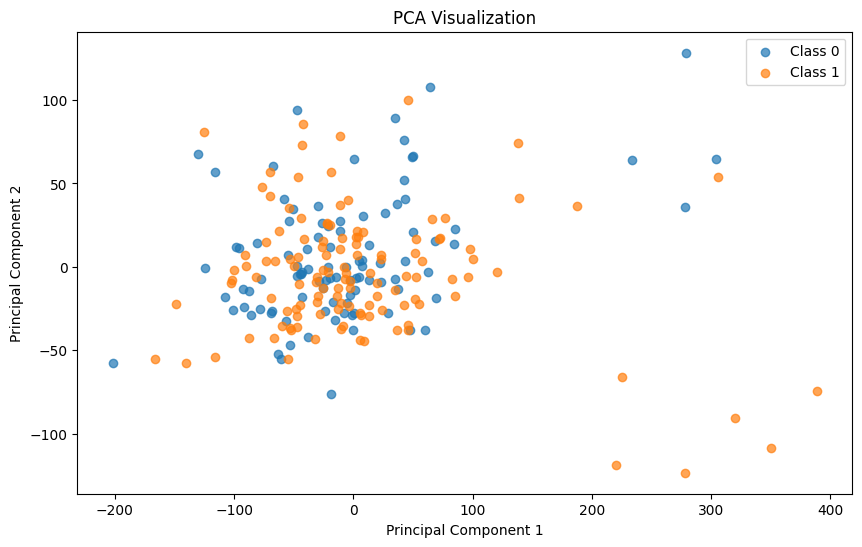

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Step 8: Visualize data using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
x_pca = pca.fit_transform(x_val_scaled)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[y_val == 0, 0], x_pca[y_val == 0, 1], label='Class 0', alpha=0.7)
plt.scatter(x_pca[y_val == 1, 0], x_pca[y_val == 1, 1], label='Class 1', alpha=0.7)
plt.legend()
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


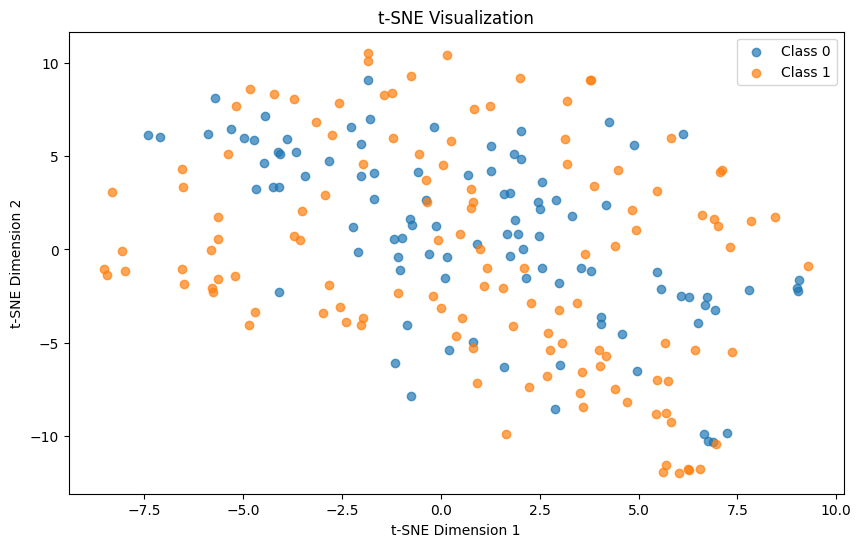

In [ ]:
from sklearn.manifold import TSNE

# Step 8: Visualize data using t-SNE
tsne = TSNE(n_components=2, random_state=14)
x_tsne = tsne.fit_transform(x_val_scaled)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_tsne[y_val == 0, 0], x_tsne[y_val == 0, 1], label='Class 0', alpha=0.7)
plt.scatter(x_tsne[y_val == 1, 0], x_tsne[y_val == 1, 1], label='Class 1', alpha=0.7)
plt.legend()
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


Hm, seems like it can't see the best correlation here that I can see whether our model is right or not by visualizing.

For the last, let's see which features our model thought it was the most important to predict the tumor size and get the best 10 RNA gene code.

In [ ]:
# Get the coefficients (feature importances)
coefficients = best_logistic_model.coef_[0]

# Map coefficients to feature names
feature_names = x.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude to identify top features
top_features = importance_df.sort_values(by='Coefficient', ascending=False)

# Print or visualize the top features
print(top_features.head(10))

               Feature  Coefficient
13265  ENSG00000177947     0.014260
13574  ENSG00000180316     0.012277
6937   ENSG00000136535     0.012182
2551   ENSG00000102239     0.011630
17012  ENSG00000233670     0.011409
14577  ENSG00000186226     0.011108
6678   ENSG00000135116     0.010801
7250   ENSG00000138161     0.010680
10178  ENSG00000162723     0.010532
7499   ENSG00000139797     0.010529


The correlation doesn't seem to high, but that could be because I am doing correlation on every column for our logistic regression. Let's look into what those 10 genes are.

Our best indicator gene ENSG00000177947 seems like it is ODF3, which is outer dense fiber of sperm tail 3. This gene has proteins that correspond to the following UniProtKB identifiers: Q96PU9. More information can be found here. https://useast.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000177947;r=11:196761-200261

When you look up the protein more specifically, the gene is CIMAP1A, and protein is Ciliary microtubule associated protein 1A. More information can be found here. https://www.uniprot.org/uniprotkb/Q96PU9/entry

This is the list for all the gene IDs we found on top 10.

ENSG00000177947    ODF3, Outer dense fiber of sperm tails 3

ENSG00000180316    PNPLA1, Omega-hydroxyceramide transacylase

ENSG00000136535    TBR1, T-box brain transcription factor 1

ENSG00000102239    BRS3, bombesin receptor subtype 3

ENSG00000233670    PIRT, phosphoinositide interacting regulator of transient receptor potential channels

ENSG00000186226    LCE1E, late cornified envelope 1E

ENSG00000135116    HRK, Activator of apoptosis harakiri (BH3-interacting domain-containing protein 3
Neuronal death protein DP5)

ENSG00000138161    CUZD1, CUB and zona pellucida-like domain-containing protein 1

ENSG00000162723    SLAMF9, SLAM family member 9

ENSG00000139797    RNF113B, RING finger protein 113B

Now, I am not the best GENE expert here, but from personal family health issues and stuff, I do know that females with high male hormone could develop many uterine related diseases due to hormone imbalance. For example, if you have high male hormones as females, you could develeop PCOS, which could lead to inability to become pregnant if not regulated with medicine and treatments and such. My guess here is that our best predictor, which is Outer dense fiber of sperm tails would be a similar case? Although female doesn't have sexual organs to create sperms itself, maybe their hormone imbalance or being born with this gene that should've been in Y chromosome of male and they happen to have this gene as female by chance in the middle of DNA splicing and mixing, maybe they have higher chance of developing UCEC (uterine corpus endometrial carcinoma), which is uterine related disease. It is just my guess to make sense of it for our project and extra credit.

Extra: These were my failed attemps to get the code working, but I kept them as reference so I can look back and pull the useful parts of the code as I was coding.

In [ ]:
# # Define cross-validation metrics
# scoring = {
#     'f1_score': make_scorer(f1_score),
#     'accuracy': make_scorer(accuracy_score)
# }

# for name, model in models:
#     if name != 'Logistic Regression':
#         # Normalize the features for linear regression models
#         scaler = StandardScaler()
#         x_scaled = scaler.fit_transform(x)
#     else:
#         x_scaled = x

#     # Perform cross-validation predictions for the model
#     cv_y_pred = cross_val_predict(model, x_scaled, y, cv=5)

#     y = y.ravel()
#     # Calculate F1 Score
#     f1 = f1_score(y, cv_y_pred)

#     # Calculate Accuracy
#     accuracy = accuracy_score(y, cv_y_pred)

#     # Print results
#     print(f"Model: {name}")
#     print(f"Cross-Validation F1 Score: {f1}")
#     print(f"Cross-Validation Accuracy: {accuracy}")
#     print()